# Student grades prediction

Project Description
The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades
Columns Description-  total 43 columns
-Seat No : The enrolled number of candidate that took the exams

CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.
 
· All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam

 
Predict - CGPA of a student based on different grades in four years.

Dataset Link-
· https://raw.githubusercontent.com/dsrscientist/dataset4/refs/heads/main/Grades.csv 

# Importing required modules

In [21]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Import and Loading dataset from system- Data Collection


In [22]:
df = pd.read_csv(r"https://raw.githubusercontent.com/dsrscientist/dataset4/refs/heads/main/Grades.csv ")
df.head()

Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102 EE-119  \
0  CS-97001     B-     D+     C-         C     C-     D+      D     C-     B-   
1  CS-97002      A      D     D+         D     B-      C      D      A     D+   
2  CS-97003      A      B      A        B-     B+      A     B-     B+     A-   
3  CS-97004      D     C+     D+         D      D     A-     D+     C-      D   
4  CS-97005     A-     A-     A-        B+      A      A     A-     B+      A   

   ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423 CS-412   CGPA  
0  ...     C-     C-     C-     C-     A-      A     C-      B     A-  2.205  
1  ...     D+      D      C      D     A-     B-      C      C      B  2.008  
2  ...      B      B      A      C      A      A      A     A-      A  3.608  
3  ...     D+      C     D+     C-     B-      B     C+     C+     C+  1.906  
4  ...     B-     B+     B+     B-     A-      A     A-     A-      A  3.448  

[5 rows x 43 columns]

In [23]:
df

Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102  \
0    CS-97001     B-     D+     C-         C     C-     D+      D     C-   
1    CS-97002      A      D     D+         D     B-      C      D      A   
2    CS-97003      A      B      A        B-     B+      A     B-     B+   
3    CS-97004      D     C+     D+         D      D     A-     D+     C-   
4    CS-97005     A-     A-     A-        B+      A      A     A-     B+   
..        ...    ...    ...    ...       ...    ...    ...    ...    ...   
566  CS-97567      B      A      A        A-     A+      A     A-     A-   
567  CS-97568     A+      A      A         A      A      A      A     A-   
568  CS-97569      B      A     A-        B+      A      A      A      A   
569  CS-97570      A     B+      D         A      D     D+     B-     C-   
570  CS-97571      C      D      D         C      C     D+      B     C+   

    EE-119  ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423  \
0       B-  ...     C-     C-     C-     C-     A-      A     C-      B   
1       D+  ...     D+      D      C      D     A-     B-      C      C   
2       A-  ...      B      B      A      C      A      A      A     A-   
3        D  ...     D+      C     D+     C-     B-      B     C+     C+   
4        A  ...     B-     B+     B+     B-     A-      A     A-     A-   
..     ...  ...    ...    ...    ...    ...    ...    ...    ...    ...   
566     A+  ...     A-     A-      A      A      A     B+     B+      B   
567      A  ...     B+     B+      A      A     A-      B     A-      C   
568      A  ...     A-      B      A     B+      A      C     B+     A-   
569     B-  ...      D      B      B     C-      D      C      B     B-   
570      C  ...     C+      C     B-      D      F     C-     B+      D   

    CS-412   CGPA  
0       A-  2.205  
1        B  2.008  
2        A  3.608  
3       C+  1.906  
4        A  3.448  
..     ...    ...  
566      A  3.798  
567     A-  3.772  
568     A-  3.470  
569      C  2.193  
570     C-  1.753  

[571 rows x 43 columns]

In [3]:
df.shape

(571, 43)

In [ ]:
# Total 571 rows and 43 columns available in data set out of which 1 is target variable and remaining 42 are indipendent variable

In [4]:
df.head(15)

Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102  \
0   CS-97001     B-     D+     C-         C     C-     D+      D     C-   
1   CS-97002      A      D     D+         D     B-      C      D      A   
2   CS-97003      A      B      A        B-     B+      A     B-     B+   
3   CS-97004      D     C+     D+         D      D     A-     D+     C-   
4   CS-97005     A-     A-     A-        B+      A      A     A-     B+   
5   CS-97006      A     B-      B        D+     C+     A-     C+      B   
6   CS-97007     B-     C-     A-         D     A-      B      A     B+   
7   CS-97008     B+     B+     C+         C      C     A-     C-     A-   
8   CS-97009     A-      C     A-        D+      B     A-     A-     A-   
9   CS-97010      A      B     C+         B      B     A-      C     B-   
10  CS-97011     A-     B-     B+        C-     C-     B-     C+     B-   
11  CS-97012     A-      C     A-        C+     C-      A     B-     B+   
12  CS-97013      B      C     A-         C     B-      B     D+      C   
13  CS-97014      A     C-     A-        C-      B     A-     C+     A-   
14  CS-97015      A      C     A-        C+     A-      A     B-     A-   

   EE-119  ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423 CS-412  \
0      B-  ...     C-     C-     C-     C-     A-      A     C-      B     A-   
1      D+  ...     D+      D      C      D     A-     B-      C      C      B   
2      A-  ...      B      B      A      C      A      A      A     A-      A   
3       D  ...     D+      C     D+     C-     B-      B     C+     C+     C+   
4       A  ...     B-     B+     B+     B-     A-      A     A-     A-      A   
5      B+  ...      C     B-     C+     C+     A-     A-     B+     B-      B   
6      A-  ...     B-      C     B+     B-      A     A-     B+     B+      A   
7       B  ...     D+     B+     B+      C      A     B+     A-     A-     A-   
8      B+  ...     B+      B     B-     C+      A     A-     B+     A-      A   
9      A-  ...     C+     B-     B+     B-      A      A     A-      B      A   
10      A  ...      C     B-     C-     C-      B     B+     B-     C-     B+   
11     A-  ...     A-     B-     B+      C      A     A-     B-     C+     A-   
12     B+  ...     C-      C     C-      C      A     A-     B-     A-     B+   
13     A-  ...      B     A-     A-     B+     A-      A      A     A-      A   
14     A-  ...     C+     A-     A-     B+     A-     A+      A      A      A   

     CGPA  
0   2.205  
1   2.008  
2   3.608  
3   1.906  
4   3.448  
5   3.026  
6   2.957  
7   3.043  
8   3.358  
9   3.247  
10  2.681  
11  3.281  
12  2.792  
13  3.523  
14  3.443  

[15 rows x 43 columns]

In [6]:
df.tail(15)

Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102  \
556  CS-97557      A     B+     A+         A      A     B+     A-      B   
557  CS-97558     B+     C+      B        A-     B-     B+     B+      C   
558  CS-97559     A-     B-      A         A     A-      A     B+     A-   
559  CS-97560     A-     C+      A         B      B     A-     C+      D   
560  CS-97561     B+     C-      A        D+     C+     A-     C-     C+   
561  CS-97562     B-      B     A-        B+     B-     B+     A-      A   
562  CS-97563      B      B      A         C      B     B+      B     C-   
563  CS-97564     A-      B      A        D+     B+     A-      C      A   
564  CS-97565     A-      D      A         C     B+     B+      C     A-   
565  CS-97566      F      F      D        C-    NaN     D+      D    NaN   
566  CS-97567      B      A      A        A-     A+      A     A-     A-   
567  CS-97568     A+      A      A         A      A      A      A     A-   
568  CS-97569      B      A     A-        B+      A      A      A      A   
569  CS-97570      A     B+      D         A      D     D+     B-     C-   
570  CS-97571      C      D      D         C      C     D+      B     C+   

    EE-119  ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423  \
556     A-  ...      A     A-      A     B+      A      B      A     B+   
557      B  ...     C-      C     A-      C     C+     D+      B     C-   
558     B+  ...     B+     B+      A      B      C      D     A-     D+   
559      B  ...     B+     B-      A     A-      A      C     B+     B+   
560     C+  ...     B+      C     B+     C-     C-      F      C      D   
561      B  ...     B+     B-     B+     D+     C+     B-     B+      C   
562     B+  ...     A-      B     B+     B+     B+     C+     A-     D+   
563     C+  ...     B+      C     B+     C-     C-      C      F      D   
564     B-  ...      B     C+     B+     D+      C     C-      B      C   
565    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
566     A+  ...     A-     A-      A      A      A     B+     B+      B   
567      A  ...     B+     B+      A      A     A-      B     A-      C   
568      A  ...     A-      B      A     B+      A      C     B+     A-   
569     B-  ...      D      B      B     C-      D      C      B     B-   
570      C  ...     C+      C     B-      D      F     C-     B+      D   

    CS-412   CGPA  
556      A  3.624  
557      C  2.429  
558      C  3.172  
559     A-  3.226  
560     C-  2.370  
561     C+  2.828  
562     C+  2.821  
563      C  2.612  
564     B-  2.607  
565    NaN  0.800  
566      A  3.798  
567     A-  3.772  
568     A-  3.470  
569      C  2.193  
570     C-  1.753  

[15 rows x 43 columns]

In [ ]:
# Check Columns Name as list

In [8]:
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [5]:
df.columns.tolist()

['Seat No.',
 'PH-121',
 'HS-101',
 'CY-105',
 'HS-105/12',
 'MT-111',
 'CS-105',
 'CS-106',
 'EL-102',
 'EE-119',
 'ME-107',
 'CS-107',
 'HS-205/20',
 'MT-222',
 'EE-222',
 'MT-224',
 'CS-210',
 'CS-211',
 'CS-203',
 'CS-214',
 'EE-217',
 'CS-212',
 'CS-215',
 'MT-331',
 'EF-303',
 'HS-304',
 'CS-301',
 'CS-302',
 'TC-383',
 'MT-442',
 'EL-332',
 'CS-318',
 'CS-306',
 'CS-312',
 'CS-317',
 'CS-403',
 'CS-421',
 'CS-406',
 'CS-414',
 'CS-419',
 'CS-423',
 'CS-412',
 'CGPA']

# Expolratory Data Analysis-EDA

In [ ]:
# Checking the types of columns

In [6]:
df.dtypes

Seat No.      object
PH-121        object
HS-101        object
CY-105        object
HS-105/12     object
MT-111        object
CS-105        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
CGPA         float64
dtype: object

In [ ]:
#  Here is two types of data avialable object and float

In [ ]:
# Checking the dataset and gether information

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [25]:
#Lets rename columns for similarity
df.rename(columns={'HS-105/12': 'HS-105', 'HS-205/20': 'HS-205'},inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Seat No.  571 non-null    object 
 1   PH-121    571 non-null    object 
 2   HS-101    571 non-null    object 
 3   CY-105    570 non-null    object 
 4   HS-105    570 non-null    object 
 5   MT-111    569 non-null    object 
 6   CS-105    571 non-null    object 
 7   CS-106    569 non-null    object 
 8   EL-102    569 non-null    object 
 9   EE-119    569 non-null    object 
 10  ME-107    569 non-null    object 
 11  CS-107    569 non-null    object 
 12  HS-205    566 non-null    object 
 13  MT-222    566 non-null    object 
 14  EE-222    564 non-null    object 
 15  MT-224    564 non-null    object 
 16  CS-210    564 non-null    object 
 17  CS-211    566 non-null    object 
 18  CS-203    566 non-null    object 
 19  CS-214    565 non-null    object 
 20  EE-217    565 non-null    object

In [ ]:
# Checking null value in the dataset

In [27]:
df.isnull().sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       1
HS-105       1
MT-111       2
CS-105       0
CS-106       2
EL-102       2
EE-119       2
ME-107       2
CS-107       2
HS-205       5
MT-222       5
EE-222       7
MT-224       7
CS-210       7
CS-211       5
CS-203       5
CS-214       6
EE-217       6
CS-212       6
CS-215       6
MT-331       9
EF-303      10
HS-304      10
CS-301      10
CS-302      10
TC-383      10
MT-442      10
EL-332       9
CS-318       9
CS-306       9
CS-312      10
CS-317      12
CS-403      12
CS-421      12
CS-406      85
CS-414      13
CS-419      13
CS-423      14
CS-412      79
CGPA         0
dtype: int64

In [28]:
df.isnull().sum().sum()

425

In [ ]:
# total 425 null value available in this dataset

In [ ]:
# Checkig the unique value available in columns data and that define the grade provided as per GPA 

In [29]:
df['PH-121'].unique().tolist()

['B-', 'A', 'D', 'A-', 'B+', 'B', 'C+', 'C', 'C-', 'D+', 'WU', 'A+', 'F']

In [ ]:
# here total 13 unique value for grade provided but as per gpa great provision "WU" is not availble for grade calculation so we have to drop this records 

In [30]:
for i in df.columns:
    df.drop(df[(df.loc[:,i]=='WU')| (df.loc[:,i]=='W')].index,inplace=True)

In [31]:
df['PH-121'].unique().tolist()

['B-', 'A', 'D', 'A-', 'B+', 'B', 'C+', 'C', 'C-', 'D+', 'A+', 'F']

In [ ]:
# Since seat number doesnot seem like a strong predictor of cgpa we drop it

In [ ]:
# Lets drop the seat no columns

In [33]:
df.drop(['Seat No.'],axis='columns',inplace=True)

In [34]:
df.head()

PH-121 HS-101 CY-105 HS-105 MT-111 CS-105 CS-106 EL-102 EE-119 ME-107  ...  \
0     B-     D+     C-      C     C-     D+      D     C-     B-     C-  ...   
1      A      D     D+      D     B-      C      D      A     D+      D  ...   
2      A      B      A     B-     B+      A     B-     B+     A-     A-  ...   
3      D     C+     D+      D      D     A-     D+     C-      D     C+  ...   
4     A-     A-     A-     B+      A      A     A-     B+      A     A-  ...   

  CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423 CS-412   CGPA  
0     C-     C-     C-     C-     A-      A     C-      B     A-  2.205  
1     D+      D      C      D     A-     B-      C      C      B  2.008  
2      B      B      A      C      A      A      A     A-      A  3.608  
3     D+      C     D+     C-     B-      B     C+     C+     C+  1.906  
4     B-     B+     B+     B-     A-      A     A-     A-      A  3.448  

[5 rows x 42 columns]

In [ ]:
# Filling null values in the dataset

In [35]:
dfnew = df.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [36]:
dfnew.isnull().sum()

PH-121    0
HS-101    0
CY-105    0
HS-105    0
MT-111    0
CS-105    0
CS-106    0
EL-102    0
EE-119    0
ME-107    0
CS-107    0
HS-205    0
MT-222    0
EE-222    0
MT-224    0
CS-210    0
CS-211    0
CS-203    0
CS-214    0
EE-217    0
CS-212    0
CS-215    0
MT-331    0
EF-303    0
HS-304    0
CS-301    0
CS-302    0
TC-383    0
MT-442    0
EL-332    0
CS-318    0
CS-306    0
CS-312    0
CS-317    0
CS-403    0
CS-421    0
CS-406    0
CS-414    0
CS-419    0
CS-423    0
CS-412    0
CGPA      0
dtype: int64

In [ ]:
# now no null value avilable in dataset 

In [ ]:
# Checking the null value via heatmap visualization

<Axes: >

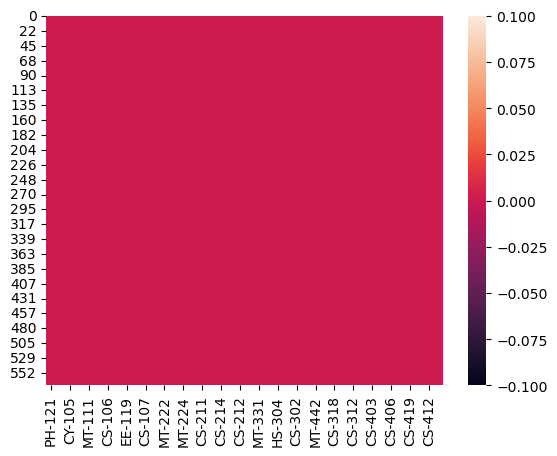

In [37]:
sns.heatmap(dfnew.isnull())

In [38]:
dfnew ['PH-121'].unique().tolist()

['B-', 'A', 'D', 'A-', 'B+', 'B', 'C+', 'C', 'C-', 'D+', 'A+', 'F']

In [ ]:
# their are 13 types of grade value available in data in object data type
# Now lets convert object data type in numerical data type

In [39]:
for column in dfnew.columns:
    
    dfnew[column]=dfnew[column].replace('A+',4.0)
    dfnew[column]=dfnew[column].replace('A',4.0)
    dfnew[column]=dfnew[column].replace('A-',3.7)
    dfnew[column]=dfnew[column].replace('B+',3.4)
    dfnew[column]=dfnew[column].replace('B',3.0)
    dfnew[column]=dfnew[column].replace('B-',2.7)
    dfnew[column]=dfnew[column].replace('C+',2.4)
    dfnew[column]=dfnew[column].replace('C',2.0)
    dfnew[column]=dfnew[column].replace('C-',1.7)
    dfnew[column]=dfnew[column].replace('D+',1.4)
    dfnew[column]=dfnew[column].replace('D',1.0)
    dfnew[column]=dfnew[column].replace('F',0.0)

In [40]:
dfnew

PH-121  HS-101  CY-105  HS-105  MT-111  CS-105  CS-106  EL-102  EE-119  \
0       2.7     1.4     1.7     2.0     1.7     1.4     1.0     1.7     2.7   
1       4.0     1.0     1.4     1.0     2.7     2.0     1.0     4.0     1.4   
2       4.0     3.0     4.0     2.7     3.4     4.0     2.7     3.4     3.7   
3       1.0     2.4     1.4     1.0     1.0     3.7     1.4     1.7     1.0   
4       3.7     3.7     3.7     3.4     4.0     4.0     3.7     3.4     4.0   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
566     3.0     4.0     4.0     3.7     4.0     4.0     3.7     3.7     4.0   
567     4.0     4.0     4.0     4.0     4.0     4.0     4.0     3.7     4.0   
568     3.0     4.0     3.7     3.4     4.0     4.0     4.0     4.0     4.0   
569     4.0     3.4     1.0     4.0     1.0     1.4     2.7     1.7     2.7   
570     2.0     1.0     1.0     2.0     2.0     1.4     3.0     2.4     2.0   

     ME-107  ...  CS-312  CS-317  CS-403  CS-421  CS-406  CS-414  CS-419  \
0       1.7  ...     1.7     1.7     1.7     1.7     3.7     4.0     1.7   
1       1.0  ...     1.4     1.0     2.0     1.0     3.7     2.7     2.0   
2       3.7  ...     3.0     3.0     4.0     2.0     4.0     4.0     4.0   
3       2.4  ...     1.4     2.0     1.4     1.7     2.7     3.0     2.4   
4       3.7  ...     2.7     3.4     3.4     2.7     3.7     4.0     3.7   
..      ...  ...     ...     ...     ...     ...     ...     ...     ...   
566     3.4  ...     3.7     3.7     4.0     4.0     4.0     3.4     3.4   
567     4.0  ...     3.4     3.4     4.0     4.0     3.7     3.0     3.7   
568     3.0  ...     3.7     3.0     4.0     3.4     4.0     2.0     3.4   
569     1.7  ...     1.0     3.0     3.0     1.7     1.0     2.0     3.0   
570     1.4  ...     2.4     2.0     2.7     1.0     0.0     1.7     3.4   

     CS-423  CS-412   CGPA  
0       3.0     3.7  2.205  
1       2.0     3.0  2.008  
2       3.7     4.0  3.608  
3       2.4     2.4  1.906  
4       3.7     4.0  3.448  
..      ...     ...    ...  
566     3.0     4.0  3.798  
567     2.0     3.7  3.772  
568     3.7     3.7  3.470  
569     2.7     2.0  2.193  
570     1.0     1.7  1.753  

[547 rows x 42 columns]

In [ ]:
# Lets checking the data types

In [41]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
Index: 547 entries, 0 to 570
Data columns (total 42 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PH-121  547 non-null    float64
 1   HS-101  547 non-null    float64
 2   CY-105  547 non-null    float64
 3   HS-105  547 non-null    float64
 4   MT-111  547 non-null    float64
 5   CS-105  547 non-null    float64
 6   CS-106  547 non-null    float64
 7   EL-102  547 non-null    float64
 8   EE-119  547 non-null    float64
 9   ME-107  547 non-null    float64
 10  CS-107  547 non-null    float64
 11  HS-205  547 non-null    float64
 12  MT-222  547 non-null    float64
 13  EE-222  547 non-null    float64
 14  MT-224  547 non-null    float64
 15  CS-210  547 non-null    float64
 16  CS-211  547 non-null    float64
 17  CS-203  547 non-null    float64
 18  CS-214  547 non-null    float64
 19  EE-217  547 non-null    float64
 20  CS-212  547 non-null    float64
 21  CS-215  547 non-null    float64
 22  MT-331 

In [42]:
dfnew.describe()

PH-121      HS-101      CY-105      HS-105      MT-111      CS-105  \
count  547.000000  547.000000  547.000000  547.000000  547.000000  547.000000   
mean     3.067642    2.657952    3.310055    2.916636    3.047166    3.366728   
std      0.936537    0.898506    0.873265    0.988782    0.896047    0.765265   
min      0.000000    0.000000    1.000000    1.000000    0.000000    1.000000   
25%      2.700000    2.000000    3.000000    2.000000    2.400000    3.000000   
50%      3.400000    2.700000    3.700000    3.000000    3.400000    3.700000   
75%      3.700000    3.400000    4.000000    3.700000    3.700000    4.000000   
max      4.000000    4.000000    4.000000    4.000000    4.000000    4.000000   

           CS-106      EL-102      EE-119      ME-107  ...      CS-312  \
count  547.000000  547.000000  547.000000  547.000000  ...  547.000000   
mean     3.000914    3.019927    3.060878    2.750640  ...    2.976234   
std      0.827071    0.930312    0.797366    0.995601  ...    1.012822   
min      1.000000    1.000000    1.000000    1.000000  ...    0.000000   
25%      2.700000    2.400000    2.550000    2.000000  ...    2.000000   
50%      3.000000    3.400000    3.400000    3.000000  ...    3.400000   
75%      3.700000    3.700000    3.700000    3.700000  ...    4.000000   
max      4.000000    4.000000    4.000000    4.000000  ...    4.000000   

           CS-317      CS-403      CS-421      CS-406      CS-414      CS-419  \
count  547.000000  547.000000  547.000000  547.000000  547.000000  547.000000   
mean     2.744424    3.140402    2.554662    3.373126    3.491042    3.059232   
std      0.845166    0.854419    0.865577    0.704635    0.661342    0.720730   
min      0.000000    1.000000    0.000000    0.000000    0.000000    0.000000   
25%      2.000000    2.700000    2.000000    3.000000    3.400000    2.700000   
50%      2.700000    3.400000    2.700000    3.700000    3.700000    3.000000   
75%      3.400000    4.000000    3.000000    3.700000    4.000000    3.700000   
max      4.000000    4.000000    4.000000    4.000000    4.000000    4.000000   

           CS-423      CS-412        CGPA  
count  547.000000  547.000000  547.000000  
mean     3.010603    3.342779    2.995388  
std      0.860316    0.682592    0.587388  
min      0.000000    0.000000    0.800000  
25%      2.400000    3.000000    2.587500  
50%      3.400000    3.700000    3.058000  
75%      3.700000    3.700000    3.474000  
max      4.000000    4.000000    3.985000  

[8 rows x 42 columns]

In [ ]:
# No null value found in data
# All columns having same values
# mean is greater than mid 50% value so data is skewed to the right side
# by summarizing data we found that there is a huge different 25%,50%,75% between maximum value

In [ ]:
# checking for coorelation between features

In [43]:
dfnew.corr()

PH-121    HS-101    CY-105    HS-105    MT-111    CS-105    CS-106  \
PH-121  1.000000  0.379618  0.614248  0.524738  0.446766  0.636212  0.281816   
HS-101  0.379618  1.000000  0.347801  0.501138  0.426526  0.416711  0.375925   
CY-105  0.614248  0.347801  1.000000  0.558376  0.535582  0.596149  0.374883   
HS-105  0.524738  0.501138  0.558376  1.000000  0.504060  0.511228  0.516201   
MT-111  0.446766  0.426526  0.535582  0.504060  1.000000  0.379697  0.539832   
CS-105  0.636212  0.416711  0.596149  0.511228  0.379697  1.000000  0.280244   
CS-106  0.281816  0.375925  0.374883  0.516201  0.539832  0.280244  1.000000   
EL-102  0.398753  0.359004  0.437063  0.353445  0.555459  0.318105  0.326104   
EE-119  0.643970  0.294395  0.541064  0.441802  0.422013  0.560943  0.279246   
ME-107  0.531362  0.338832  0.447586  0.355738  0.463967  0.438493  0.312114   
CS-107  0.467000  0.506486  0.468731  0.535855  0.473271  0.509919  0.442990   
HS-205  0.288743  0.189162  0.257884  0.187235  0.316148  0.136787  0.164140   
MT-222  0.555146  0.410758  0.496263  0.492305  0.516800  0.492314  0.382531   
EE-222  0.538194  0.389269  0.446521  0.380212  0.376563  0.507918  0.169036   
MT-224  0.324371  0.244496  0.423560  0.416439  0.596409  0.227865  0.464116   
CS-210  0.509981  0.338164  0.521861  0.519352  0.634602  0.433245  0.493081   
CS-211  0.313627  0.340186  0.447942  0.387315  0.557352  0.336945  0.404123   
CS-203  0.456683  0.261210  0.399940  0.323015  0.521616  0.404226  0.330324   
CS-214  0.421578  0.479756  0.504117  0.455321  0.586382  0.442587  0.483035   
EE-217  0.435778  0.370594  0.418114  0.405999  0.556638  0.359941  0.374622   
CS-212  0.366661  0.373902  0.459812  0.527468  0.609826  0.329375  0.631323   
CS-215  0.520246  0.441854  0.561902  0.521827  0.584653  0.473420  0.453110   
MT-331  0.185928  0.144076  0.385376  0.297739  0.438081  0.234124  0.346934   
EF-303  0.235983  0.263521  0.388629  0.473157  0.485277  0.230219  0.521581   
HS-304  0.510090  0.461784  0.433244  0.399963  0.335541  0.544212  0.182392   
CS-301  0.334904  0.324945  0.404436  0.490196  0.617181  0.270741  0.545095   
CS-302  0.492714  0.392386  0.510997  0.501702  0.558476  0.487819  0.385737   
TC-383  0.196195  0.352580  0.327315  0.467061  0.572434  0.227726  0.589311   
MT-442  0.508501  0.264919  0.476637  0.369401  0.442854  0.493021  0.270510   
EL-332  0.418065  0.414648  0.394645  0.417022  0.621023  0.380421  0.416494   
CS-318  0.467993  0.475786  0.378727  0.401427  0.393709  0.480631  0.264527   
CS-306  0.497774  0.467479  0.436939  0.560476  0.517097  0.456570  0.390330   
CS-312  0.020292  0.223122  0.268102  0.317844  0.526893  0.050869  0.543480   
CS-317  0.489215  0.401861  0.506767  0.532839  0.595719  0.399045  0.443215   
CS-403  0.367207  0.259491  0.540412  0.543082  0.468253  0.306536  0.512830   
CS-421  0.338734  0.329804  0.401831  0.476441  0.567281  0.269404  0.455443   
CS-406  0.296364  0.304736  0.169889  0.223110  0.300848  0.259359  0.148628   
CS-414  0.147294  0.243382  0.058096  0.130633  0.211713  0.125780  0.098559   
CS-419  0.474972  0.278332  0.500556  0.521508  0.544146  0.350886  0.486163   
CS-423  0.093352  0.248648  0.139180  0.264851  0.430495  0.054895  0.383922   
CS-412  0.278926  0.247541  0.081867  0.184608  0.294732  0.212259  0.162366   
CGPA    0.645401  0.556404  0.669354  0.660944  0.738479  0.588444  0.597217   

          EL-102    EE-119    ME-107  ...    CS-312    CS-317    CS-403  \
PH-121  0.398753  0.643970  0.531362  ...  0.020292  0.489215  0.367207   
HS-101  0.359004  0.294395  0.338832  ...  0.223122  0.401861  0.259491   
CY-105  0.437063  0.541064  0.447586  ...  0.268102  0.506767  0.540412   
HS-105  0.353445  0.441802  0.355738  ...  0.317844  0.532839  0.543082   
MT-111  0.555459  0.422013  0.463967  ...  0.526893  0.595719  0.468253   
CS-105  0.318105  0.560943  0.438493  ...  0.050869  0.399045  0.306536   
CS-106  0.326104  0.279246  0.312114  ...  0

In [ ]:
# visualizing correlation by plotting heatmap

<Axes: >

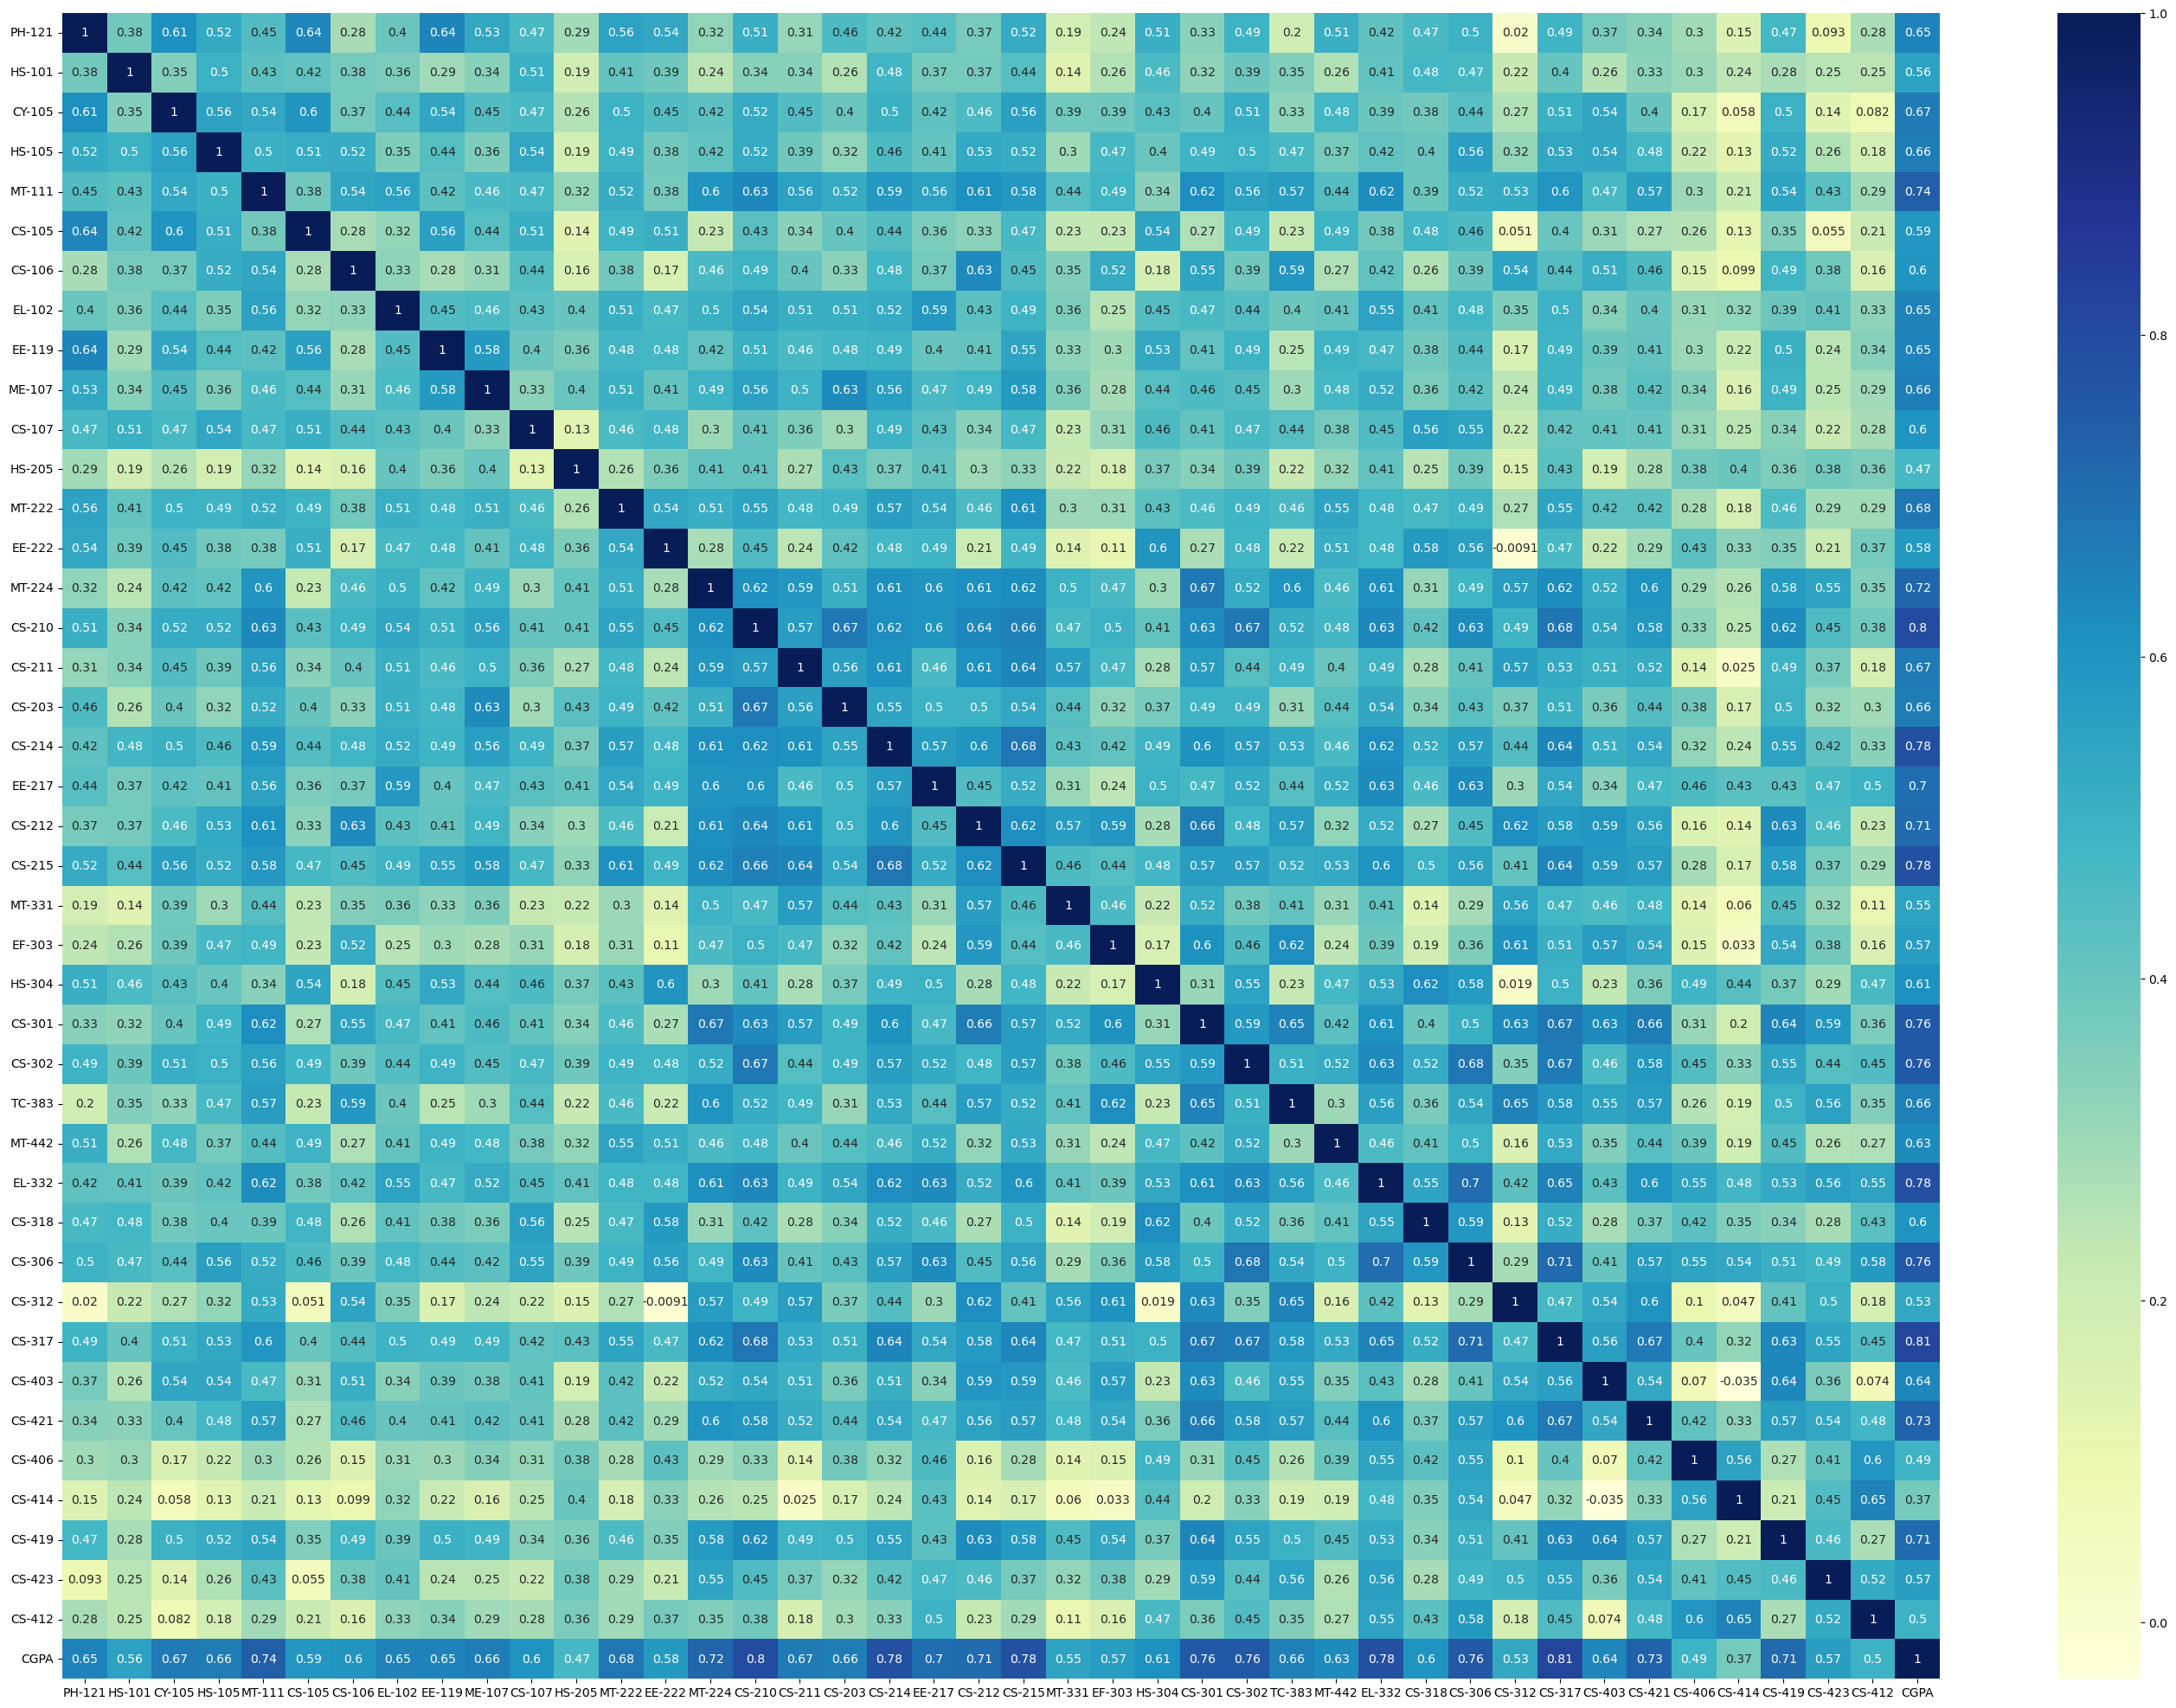

In [43]:
plt.figure(figsize=[35,25])
sns.heatmap(dfnew.corr(),annot=True, cmap='YlGnBu')

In [ ]:
# Different distribution patterns of features

In [46]:
plt.figure(figsize=[30,15])
sns.pairplot(dfnew)

<Figure size 3000x1500 with 0 Axes>

In [ ]:
# Checking for skewness

In [44]:
dfnew.skew()

PH-121   -0.913474
HS-101   -0.260073
CY-105   -1.344620
HS-105   -0.563794
MT-111   -0.779360
CS-105   -1.322190
CS-106   -0.902728
EL-102   -0.768397
EE-119   -0.772804
ME-107   -0.354597
CS-107   -0.645613
HS-205   -1.198672
MT-222   -0.379749
EE-222   -1.070221
MT-224   -0.641933
CS-210   -1.002362
CS-211   -0.260798
CS-203   -0.487893
CS-214   -0.082832
EE-217   -1.017358
CS-212   -0.591061
CS-215   -0.306944
MT-331   -0.935467
EF-303   -0.301034
HS-304   -0.648938
CS-301   -0.673505
CS-302   -0.974971
TC-383   -0.543103
MT-442   -1.286879
EL-332   -0.764509
CS-318   -0.575936
CS-306   -0.765317
CS-312   -0.515075
CS-317   -0.320288
CS-403   -0.753622
CS-421   -0.454525
CS-406   -2.116942
CS-414   -1.971622
CS-419   -0.756138
CS-423   -0.786411
CS-412   -2.069588
CGPA     -0.428093
dtype: float64

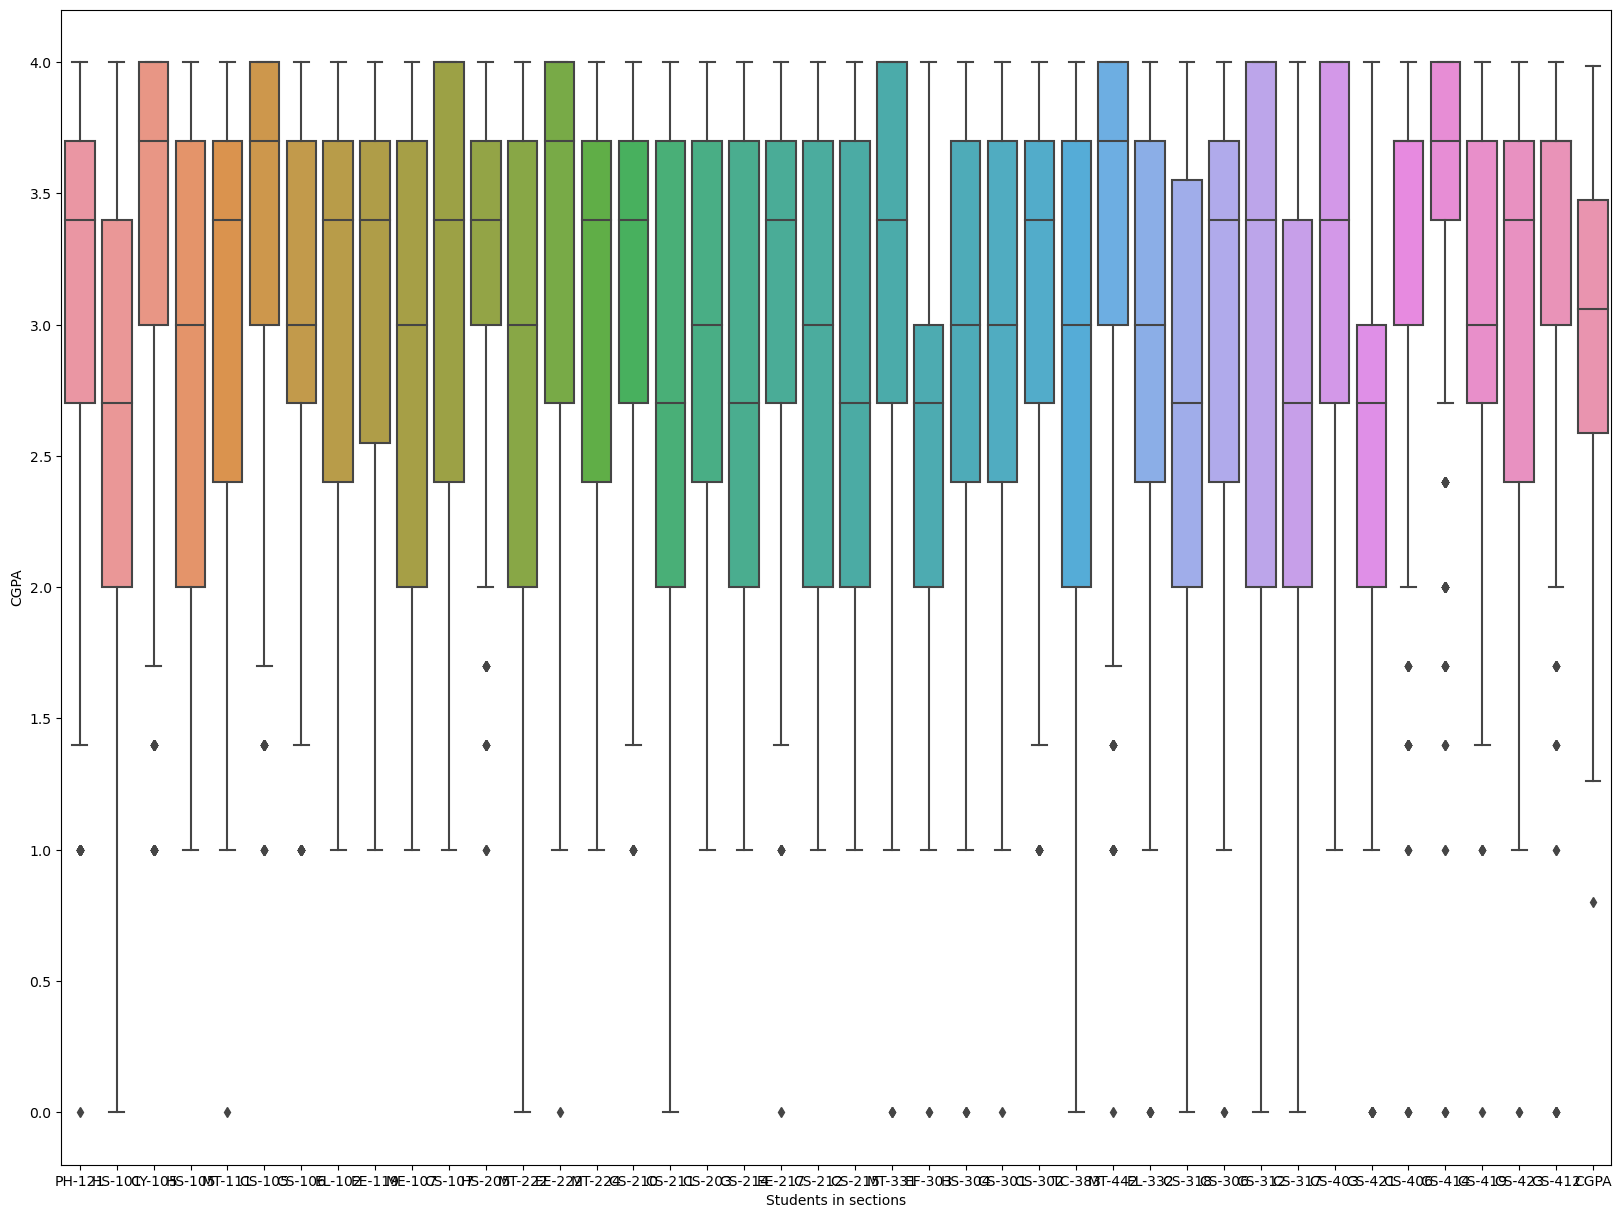

In [45]:
plt.figure(figsize=[20,15])
sns.boxplot(data=dfnew)
plt.xlabel('Students in sections')
plt.ylabel('CGPA')
plt.show()

In [ ]:
#splitting features & labels

In [46]:
x=dfnew.drop(['CGPA'], axis=1)
y= dfnew['CGPA']

In [47]:
x.head()

PH-121  HS-101  CY-105  HS-105  MT-111  CS-105  CS-106  EL-102  EE-119  \
0     2.7     1.4     1.7     2.0     1.7     1.4     1.0     1.7     2.7   
1     4.0     1.0     1.4     1.0     2.7     2.0     1.0     4.0     1.4   
2     4.0     3.0     4.0     2.7     3.4     4.0     2.7     3.4     3.7   
3     1.0     2.4     1.4     1.0     1.0     3.7     1.4     1.7     1.0   
4     3.7     3.7     3.7     3.4     4.0     4.0     3.7     3.4     4.0   

   ME-107  ...  CS-306  CS-312  CS-317  CS-403  CS-421  CS-406  CS-414  \
0     1.7  ...     2.0     1.7     1.7     1.7     1.7     3.7     4.0   
1     1.0  ...     1.0     1.4     1.0     2.0     1.0     3.7     2.7   
2     3.7  ...     3.7     3.0     3.0     4.0     2.0     4.0     4.0   
3     2.4  ...     1.7     1.4     2.0     1.4     1.7     2.7     3.0   
4     3.7  ...     3.7     2.7     3.4     3.4     2.7     3.7     4.0   

   CS-419  CS-423  CS-412  
0     1.7     3.0     3.7  
1     2.0     2.0     3.0  
2     4.0     3.7     4.0  
3     2.4     2.4     2.4  
4     3.7     3.7     4.0  

[5 rows x 41 columns]

In [48]:
y.head()

0    2.205
1    2.008
2    3.608
3    1.906
4    3.448
Name: CGPA, dtype: float64

In [ ]:
#Using Quantile transformer for skewness removal

In [49]:
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer()
np_array = qt.fit_transform(x)
np_array

array([[0.2967033 , 0.1007326 , 0.08882784, ..., 0.0503663 , 0.42857143,
        0.64835165],
       [1.        , 0.03846154, 0.06135531, ..., 0.1025641 , 0.16483516,
        0.23809524],
       [1.        , 0.61446886, 1.        , ..., 1.        , 0.73626374,
        1.        ],
       ...,
       [0.39652015, 1.        , 0.51831502, ..., 0.59249084, 0.73626374,
        0.64835165],
       [1.        , 0.72344322, 0.        , ..., 0.43681319, 0.32417582,
        0.05128205],
       [0.16391941, 0.03846154, 0.        , ..., 0.59249084, 0.01739927,
        0.02930403]])

In [50]:
x.columns

Index(['PH-121', 'HS-101', 'CY-105', 'HS-105', 'MT-111', 'CS-105', 'CS-106',
       'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205', 'MT-222', 'EE-222',
       'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
       'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
       'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412'],
      dtype='object')

In [ ]:
#converting array into dataframe

In [51]:
xt = pd.DataFrame(np_array, columns = ['PH-121', 'HS-101', 'CY-105', 'HS-105', 'MT-111', 'CS-105', 'CS-106',
       'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205', 'MT-222', 'EE-222',
       'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
       'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
       'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412'])

In [52]:
xt.head()

PH-121    HS-101    CY-105    HS-105    MT-111    CS-105    CS-106  \
0  0.296703  0.100733  0.088828  0.234432  0.110806  0.024725  0.000000   
1  1.000000  0.038462  0.061355  0.000000  0.316850  0.092491  0.000000   
2  1.000000  0.614469  1.000000  0.370879  0.530220  1.000000  0.285714   
3  0.035714  0.379121  0.061355  0.000000  0.022894  0.531136  0.066850   
4  0.656593  0.850733  0.518315  0.571429  1.000000  1.000000  0.787546   

     EL-102    EE-119    ME-107  ...    CS-306    CS-312    CS-317    CS-403  \
0  0.130037  0.291209  0.200549  ...  0.179487  0.163919  0.126374  0.094322   
1  1.000000  0.036630  0.000000  ...  0.024725  0.077839  0.018315  0.152015   
2  0.532051  0.744505  0.771978  ...  0.737179  0.450549  0.602564  1.000000   
3  0.130037  0.000000  0.359890  ...  0.110806  0.077839  0.225275  0.037546   
4  0.532051  1.000000  0.771978  ...  0.737179  0.385531  0.723443  0.485348   

     CS-421    CS-406    CS-414    CS-419    CS-423    CS-412  
0  0.173077  0.609890  1.000000  0.050366  0.428571  0.648352  
1  0.037546  0.609890  0.119048  0.102564  0.164835  0.238095  
2  0.285714  1.000000  1.000000  1.000000  0.736264  1.000000  
3  0.173077  0.137363  0.186813  0.178571  0.239927  0.088828  
4  0.524725  0.609890  1.000000  0.782967  0.736264  1.000000  

[5 rows x 41 columns]

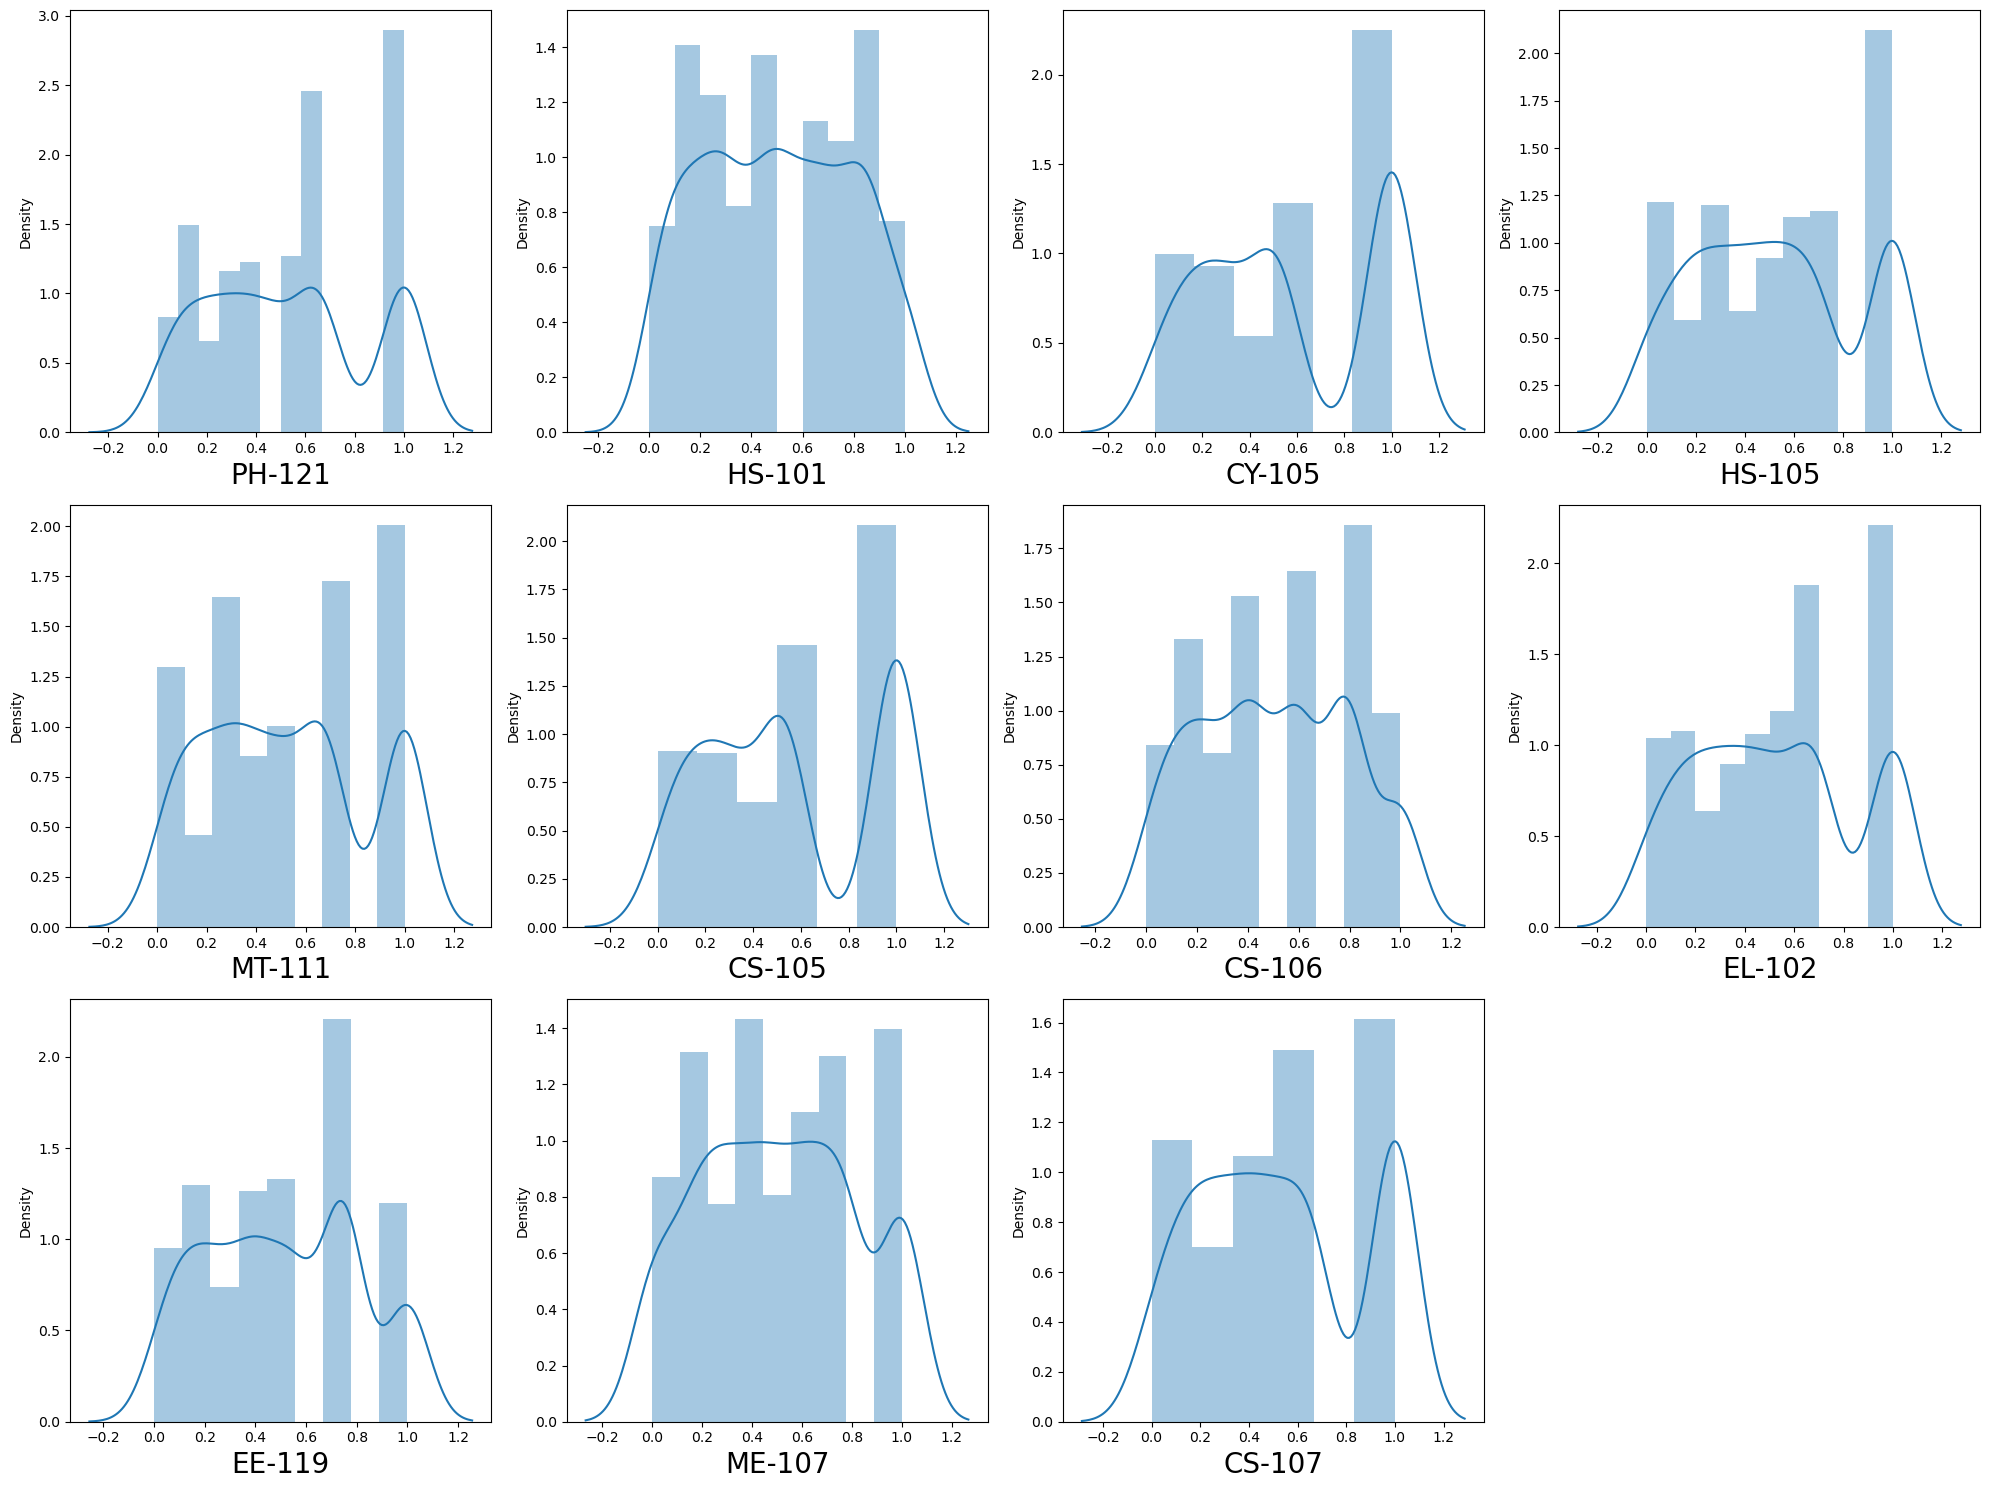

In [53]:
plt.figure(figsize = (20,15), facecolor = 'white')
plotnumber = 1 

for column in xt:
    if plotnumber <12: 
        ax = plt.subplot (3,4, plotnumber)
        sns.distplot (xt [column])
        plt.xlabel (column, fontsize =20)
    plotnumber +=1
plt.tight_layout()

# Modelling

In [ ]:
# Linear Regression

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr = LinearRegression ()
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import ExtraTreeRegressor

In [ ]:
# Creating train test split

In [ ]:
# Finding the best rendom state

In [56]:
maxAccu=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30, random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print("Maximum r2 score is", maxAccu, "on random_state",maxRs)

Maximum r2 score is 0.9965549873930976 on random_state 183


In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)


print('Intercept:', lin_reg_model.intercept_)
print('Coefficients:', lin_reg_model.coef_)

Intercept: -0.08184356384399782
Coefficients: [ 0.07524343  0.05053454  0.06347137  0.02014463 -0.00367627  0.05249381
  0.047805    0.02028511  0.00870138  0.02374215 -0.00850405  0.01703224
  0.00123527  0.01922977  0.01870577  0.03795178  0.02811615  0.014765
  0.05373048  0.01940166 -0.01371298  0.01127371  0.03747421  0.01683411
 -0.00218679  0.03945035  0.02392309  0.022161    0.0225624   0.04561044
  0.01101448  0.00426689  0.0171934   0.04236085  0.02443526  0.03369532
  0.03235677  0.03045708 -0.01027236  0.04278918  0.02594604]


In [77]:
LR = LinearRegression()
LR.fit(x_train, y_train)
predLR = LR.predict(x_test)
print("r2_score:", r2_score(y_test, predLR))
print("Mean Squared Error:", mean_squared_error(y_test, predLR))

r2_score: 0.948592335266504
Mean Squared Error: 0.016258887282075755


In [59]:
from sklearn.preprocessing import StandardScaler
Scaler= StandardScaler()
x=pd.DataFrame(Scaler.fit_transform(x),columns=x.columns)
x

PH-121    HS-101    CY-105    HS-105    MT-111    CS-105    CS-106  \
0   -0.392914 -1.401331 -1.845407 -0.927884 -1.504832 -2.572347 -2.421491   
1    0.996450 -1.846922 -2.189260 -1.940155 -0.387797 -1.787588 -2.421491   
2    0.996450  0.381033  0.790799 -0.219295  0.394128  0.828278 -0.364164   
3   -2.209774 -0.287353 -2.189260 -1.940155 -2.286756  0.435898 -1.937414   
4    0.675827  1.160817  0.446946  0.489295  1.064348  0.828278  0.846029   
..        ...       ...       ...       ...       ...       ...       ...   
542 -0.072291  1.495011  0.790799  0.792976  1.064348  0.828278  0.846029   
543  0.996450  1.495011  0.790799  1.096658  1.064348  0.828278  1.209086   
544 -0.072291  1.495011  0.446946  0.489295  1.064348  0.828278  1.209086   
545  0.996450  0.826624 -2.647731  1.096658 -2.286756 -2.572347 -0.364164   
546 -1.141032 -1.846922 -2.647731 -0.927884 -1.169721 -2.572347 -0.001106   

       EL-102    EE-119    ME-107  ...    CS-306    CS-312    CS-317  \
0   -1.420098 -0.453001 -1.056248  ... -1.112315 -1.261231 -1.236894   
1    1.054452 -2.084861 -1.759984  ... -2.242188 -1.557704 -2.065892   
2    0.408917  0.802276  0.954427  ...  0.808468  0.023487  0.302674   
3   -1.420098 -2.586972 -0.352511  ... -1.451277 -1.557704 -0.881609   
4    0.408917  1.178859  0.954427  ...  0.808468 -0.272987  0.776387   
..        ...       ...       ...  ...       ...       ...       ...   
542  0.731685  1.178859  0.652826  ...  0.469506  0.715258  1.131672   
543  0.731685  1.178859  1.256029  ...  0.808468  0.418784  0.776387   
544  1.054452  1.178859  0.250691  ...  0.469506  0.715258  0.302674   
545 -1.420098 -0.453001 -1.056248  ...  0.469506 -1.953002  0.302674   
546 -0.666974 -1.331695 -1.357849  ... -1.790239 -0.569460 -0.881609   

       CS-403    CS-421    CS-406    CS-414    CS-419    CS-423    CS-412  
0   -1.687370 -0.988294  0.464315  0.770288 -1.887636 -0.012336  0.523809  
1   -1.335933 -1.797744  0.464315 -1.197211 -1.471010 -1.175764 -0.502632  
2    1.006982 -0.641387  0.890457  0.770288  1.306493  0.802063  0.963713  
3   -2.038807 -0.988294 -0.956157 -0.743173 -0.915510 -0.710393 -1.382438  
4    0.304108  0.168063  0.464315  0.770288  0.889867  0.802063  0.963713  
..        ...       ...       ...       ...       ...       ...       ...  
542  1.006982  1.671327  0.890457 -0.137788  0.473242 -0.012336  0.963713  
543  1.006982  1.671327  0.464315 -0.743173  0.889867 -1.175764  0.523809  
544  1.006982  0.977513  0.890457 -2.256633  0.473242  0.802063  0.523809  
545 -0.164475 -0.988294 -3.370961 -2.256633 -0.082259 -0.361364 -1.968976  
546 -0.515913 -1.797744 -4.791434 -2.710671  0.473242 -2.339191 -2.408879  

[547 rows x 41 columns]

In [93]:
 # Finding Variance inflation factor in eached scaled columns

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]= [variance_inflation_factor(x.values,1) for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

VIF values Features
0     1.970505   PH-121
1     1.970505   HS-101
2     1.970505   CY-105
3     1.970505   HS-105
4     1.970505   MT-111
5     1.970505   CS-105
6     1.970505   CS-106
7     1.970505   EL-102
8     1.970505   EE-119
9     1.970505   ME-107
10    1.970505   CS-107
11    1.970505   HS-205
12    1.970505   MT-222
13    1.970505   EE-222
14    1.970505   MT-224
15    1.970505   CS-210
16    1.970505   CS-211
17    1.970505   CS-203
18    1.970505   CS-214
19    1.970505   EE-217
20    1.970505   CS-212
21    1.970505   CS-215
22    1.970505   MT-331
23    1.970505   EF-303
24    1.970505   HS-304
25    1.970505   CS-301
26    1.970505   CS-302
27    1.970505   TC-383
28    1.970505   MT-442
29    1.970505   EL-332
30    1.970505   CS-318
31    1.970505   CS-306
32    1.970505   CS-312
33    1.970505   CS-317
34    1.970505   CS-403
35    1.970505   CS-421
36    1.970505   CS-406
37    1.970505   CS-414
38    1.970505   CS-419
39    1.970505   CS-423
40    1.970505   CS-412

In [61]:
# based on vif values all columns having same effect in data set
y.value_counts()

CGPA
3.019    5
2.793    3
2.206    3
3.772    3
2.756    3
        ..
2.042    1
2.634    1
2.053    1
3.585    1
1.753    1
Name: count, Length: 470, dtype: int64

In [62]:
for i in range (0,100):
    x_train,x_test,y_train,y_test = train_test_split (xt, y, test_size = 0.2, random_state = i)
    lr.fit (x_train, y_train)
    pred_train = lr.predict (x_train)
    pred_test = lr.predict (x_test)
    print (f"At random state {i}, the training accuracy is: {r2_score (y_train, pred_train)}")
    print (f"At random state {i}, the testing accuracy is: {r2_score (y_test, pred_test)}")
    print ('\n')

At random state 0, the training accuracy is: 0.9317829182727454
At random state 0, the testing accuracy is: 0.9611884943551621


At random state 1, the training accuracy is: 0.9333241311262731
At random state 1, the testing accuracy is: 0.9619542770324292


At random state 2, the training accuracy is: 0.9366660886371694
At random state 2, the testing accuracy is: 0.9464575120645711


At random state 3, the training accuracy is: 0.9685044158028591
At random state 3, the testing accuracy is: 0.8127409868472536


At random state 4, the training accuracy is: 0.933251073744559
At random state 4, the testing accuracy is: 0.9529906594846442


At random state 5, the training accuracy is: 0.937906714082707
At random state 5, the testing accuracy is: 0.9400537992076562


At random state 6, the training accuracy is: 0.9316979938344571
At random state 6, the testing accuracy is: 0.9619808777072799


At random state 7, the training accuracy is: 0.9670415154791473
At random state 7, the testing accu

At random state 63, the training accuracy is: 0.9362552696276711
At random state 63, the testing accuracy is: 0.9427058995180626


At random state 64, the training accuracy is: 0.9312980339048844
At random state 64, the testing accuracy is: 0.9698719295598678


At random state 65, the training accuracy is: 0.934356094910916
At random state 65, the testing accuracy is: 0.9563304398067763


At random state 66, the training accuracy is: 0.9694806003908232
At random state 66, the testing accuracy is: 0.7987216879511169


At random state 67, the training accuracy is: 0.9674059937730924
At random state 67, the testing accuracy is: 0.8218840495501136


At random state 68, the training accuracy is: 0.9324584862377099
At random state 68, the testing accuracy is: 0.9666524566265087


At random state 69, the training accuracy is: 0.9324002284113261
At random state 69, the testing accuracy is: 0.9631024141247746


At random state 70, the training accuracy is: 0.9320268047054613
At random state 70,

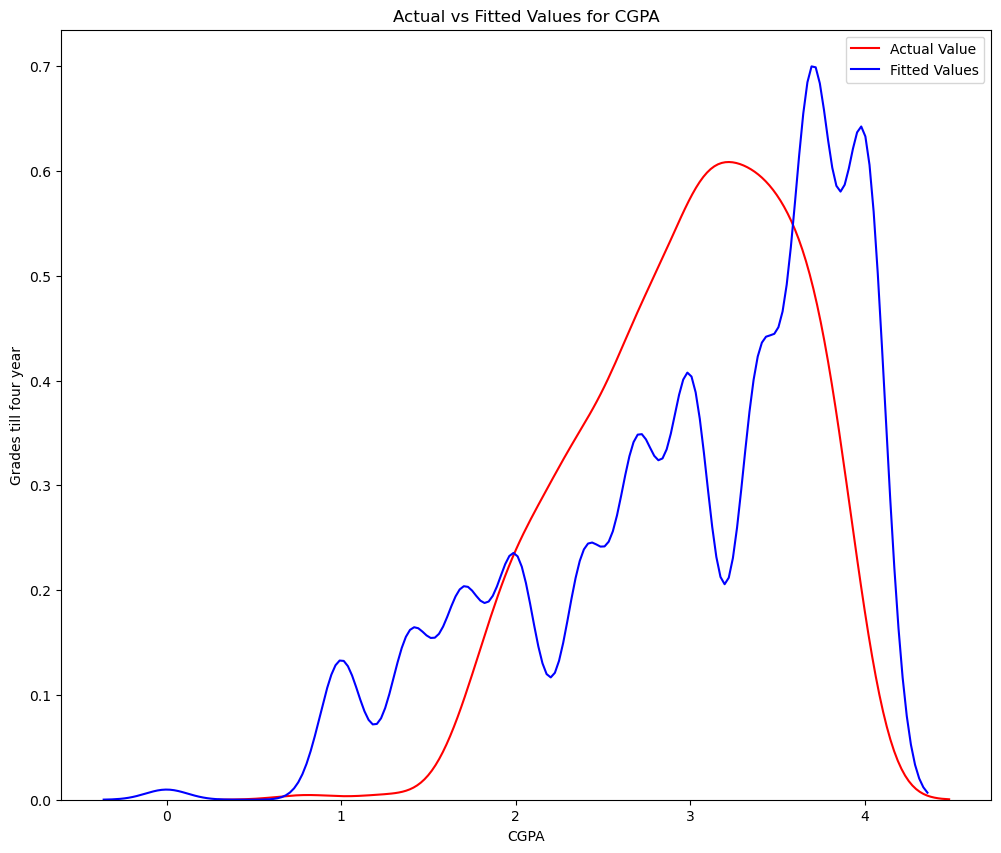

In [63]:
width = 12
height = 10
plt.figure(figsize=(width, height))


ax1 = sns.distplot(dfnew['CGPA'], hist=False, color="r", label="Actual Value")
sns.distplot(dfnew, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for CGPA')
plt.xlabel('CGPA')
plt.ylabel('Grades till four year')

plt.legend()
plt.show()
plt.close()

In [ ]:
# Decision tree regressor

In [78]:
DC = DecisionTreeRegressor()
DC.fit(x_train, y_train)
predDC = DC.predict(x_test)
print("r2_score:", r2_score(y_test, predDC))
print("Mean Squared Error:", mean_squared_error(y_test, predDC))

r2_score: 0.8232136247554512
Mean Squared Error: 0.055912863636363636


In [ ]:
# KNeighborsRegressor - KNN 

In [79]:
KNN = KNeighborsRegressor()
KNN.fit(x_train, y_train)
predKNN = KNN.predict(x_test)
print("r2_score:", r2_score(y_test, predKNN))
print("Mean Squared Error:", mean_squared_error(y_test, predKNN))

r2_score: 0.9640170353904592
Mean Squared Error: 0.01138046181818181


In [ ]:
# Support Vector Regression

In [80]:
svr = SVR()
svr.fit(x_train, y_train)
predSVR = svr.predict(x_test)
print("r2_score:", r2_score(y_test, predSVR))
print("Mean Squared Error:", mean_squared_error(y_test, predSVR))

r2_score: 0.9680792019756018
Mean Squared Error: 0.010095705761449043


In [81]:
LR = LinearRegression()
LR.fit(x_train, y_train)
predLR = LR.predict(x_test)
print("r2_score:", r2_score(y_test, predLR))
print("Mean Squared Error:", mean_squared_error(y_test, predLR))

r2_score: 0.948592335266504
Mean Squared Error: 0.016258887282075755


In [ ]:
# RandomForestRegressor

In [82]:
RFR = RandomForestRegressor()
RFR.fit(x_train, y_train)
predRFR = RFR.predict(x_test)
print("r2_score:", r2_score(y_test, predRFR))
print("Mean Squared Error:", mean_squared_error(y_test, predRFR))

r2_score: 0.9521600874465271
Mean Squared Error: 0.015130501450000002


In [ ]:
# GradientBoostingRegressor

In [83]:
GBR = GradientBoostingRegressor()
GBR.fit(x_train, y_train)
predGBR = GBR.predict(x_test)
print("r2_score:", r2_score(y_test, predGBR))
print("Mean Squared Error:", mean_squared_error(y_test, predGBR))

r2_score: 0.9676565745336165
Mean Squared Error: 0.010229371664718


In [ ]:
# ExtraTreeRegressor

In [84]:
ETR = ExtraTreeRegressor()
ETR.fit(x_train, y_train)
predETR = ETR.predict(x_test)
print("r2_score:", r2_score(y_test, predETR))
print("Mean Squared Error:", mean_squared_error(y_test, predETR))

r2_score: 0.8023195750232766
Mean Squared Error: 0.06252109999999998


In [85]:
score= cross_val_score(LR,x,y,cv=5,scoring='r2')

In [95]:
score1 =cross_val_score(RFR,x,y)
print(score1)
print(score1.mean)
print(" Differance between r2_score and Cross Validation Score is :-", (r2_score(y_test,predRFR)-score.mean())*100)

[0.94352431 0.94295942 0.95611289 0.94910418 0.78985066]
<built-in method mean of numpy.ndarray object at 0x0000027B760D8DB0>
 Differance between r2_score and Cross Validation Score is :- 0.2661747960397087


In [104]:
score2 =cross_val_score(svr,x,y)
print(score2)
print(score2.mean)
print(" Differance between r2_score and Cross Validation Score is :-", (r2_score(y_test,predSVR)-score.mean())*100)

[0.94491165 0.97654308 0.96808105 0.96160496 0.85787987]
<built-in method mean of numpy.ndarray object at 0x0000027B04391A70>
 Differance between r2_score and Cross Validation Score is :- 1.8580862489471772


In [98]:
score3 =cross_val_score(LR,x,y)
print(score3)
print(score3.mean)
print(" Differance between r2_score and Cross Validation Score is :-", (r2_score(y_test,predLR)-score.mean())*100)

[0.97354315 0.98463555 0.96961757 0.98691233 0.83278309]
<built-in method mean of numpy.ndarray object at 0x0000027B042E9170>
 Differance between r2_score and Cross Validation Score is :- -0.09060042196260554


In [99]:
score4 =cross_val_score(DC,x,y)
print(score4)
print(score4.mean)
print(" Differance between r2_score and Cross Validation Score is :-", (r2_score(y_test,predDC)-score.mean())*100)

[0.81128962 0.74814909 0.81469069 0.7900835  0.69718465]
<built-in method mean of numpy.ndarray object at 0x0000027B042E8CF0>
 Differance between r2_score and Cross Validation Score is :- -12.628471473067881


In [100]:
score5 =cross_val_score(ETR,x,y)
print(score5)
print(score5.mean)
print(" Differance between r2_score and Cross Validation Score is :-", (r2_score(y_test,predETR)-score.mean())*100)

[0.87386718 0.80050331 0.77644061 0.78205363 0.67954008]
<built-in method mean of numpy.ndarray object at 0x0000027B042E8AB0>
 Differance between r2_score and Cross Validation Score is :- -14.717876446285349


In [101]:
score6 =cross_val_score(GBR,x,y)
print(score6)
print(score6.mean)
print(" Differance between r2_score and Cross Validation Score is :-", (r2_score(y_test,predGBR)-score.mean())*100)

[0.9628893  0.9708556  0.96848051 0.94586727 0.79443572]
<built-in method mean of numpy.ndarray object at 0x0000027B042E95F0>
 Differance between r2_score and Cross Validation Score is :- 1.8158235047486482


In [102]:
score7 =cross_val_score(KNN,x,y)
print(score7)
print(score7.mean)
print(" Differance between r2_score and Cross Validation Score is :-", (r2_score(y_test,predKNN)-score.mean())*100)

[0.96603093 0.95945519 0.95125061 0.95529198 0.78690737]
<built-in method mean of numpy.ndarray object at 0x0000027B042E89F0>
 Differance between r2_score and Cross Validation Score is :- 1.4518695904329193


# from the differance of both r2 score and cross validation score computed on r2 score we can conclude that Random forest regressor as out best fitting and best performing model

In [127]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

param = {
    'alpha': [1.0, 0.5, 4.2],
    'fit_intercept': [True, False],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag', 'saga', 'lbfgs'],
    'positive': [False, True],
    'random_state': range(1, 20),
}

gscv = GridSearchCV(Ridge(), param, cv=5)
gscv.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1.0, 0.5, 4.2],
                         'fit_intercept': [True, False],
                         'positive': [False, True],
                         'random_state': range(1, 20),
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag',
                                    'saga', 'lbfgs']})

In [118]:
gscv.best_params_

{'alpha': 4.2,
 'fit_intercept': True,
 'positive': True,
 'random_state': 1,
 'solver': 'auto'}

In [128]:
model = Ridge(alpha=4.2, fit_intercept=True, positive=False, random_state=1, solver='lsqr')
model.fit(x_train, y_train)
pred = model.predict(x_test)

print("R2 Score:", r2_score(y_test, pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, pred))
print("Mean Squared Error:", mean_squared_error(y_test, pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, pred)))


R2 Score: 0.9540486099595915
Mean Absolute Error: 0.0938309037592652
Mean Squared Error: 0.014533211632834497
Root Mean Squared Error: 0.12055377071180519


# Final result of this dataset file is 95% accuracy 

In [ ]:
# Let's Save the model

In [130]:
import joblib
joblib.dump(model,"Student_Grade_Prediction.pkl")

['Student_Grade_Prediction.pkl']

In [131]:
import pickle
filename = 'Student_Grade_Prediction.pkl'
pickle.dump(model,open('Student_Grade_Prediction.pkl','wb'))

In [135]:
loaded_model = pickle.load(open('Student_Grade_Prediction.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

95.40486099595915


In [137]:
conclusion= pd.DataFrame([loaded_model.predict(x_test)[:], y_test[:]],index=["predicted","Original"])
conclusion

0         1         2         3         4         5    \
predicted  3.000476  2.101272  3.033448  2.748094  3.197075  2.197338   
Original   3.116000  1.905000  3.033000  2.760000  3.172000  1.955000   

                6        7         8         9    ...       100       101  \
predicted  2.881474  2.25906  2.219629  3.107913  ...  2.893033  3.023031   
Original   2.957000  2.20800  2.254000  3.023000  ...  3.058000  3.156000   

                102       103       104       105       106       107  \
predicted  2.990388  3.145165  2.998866  3.151004  3.795862  3.726134   
Original   3.030000  3.114000  3.240000  3.335000  3.664000  3.696000   

                108       109  
predicted  3.111591  3.279417  
Original   3.229000  3.334000  

[2 rows x 110 columns]